<a href="https://colab.research.google.com/github/ejrbdx/Advance-Research-Methods-2024/blob/main/Homework_1_EJR_2_15_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#this cell imports anything I need
import os,cv2
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path
from PIL import Image
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [3]:
#this cell is my dataloader
class load_data(Dataset):
  def __init__(self,root_dir,csv_path,classify,transform=None):
    print('initialize')
    self.root = Path(root_dir) # This intiailizes my variables/inputs
    self.csv_path = csv_path
    self.transform = transform
    self.classify = classify

    if self.classify == False: # If this is False then it will work with the Localize data, if it's true then it will work with the Classification data
      self.df_train = pd.read_csv(os.path.join(self.root,self.csv_path)) # read csv
      self.df = pd.DataFrame(columns = ['image_names','class_label','bbox']) # creates dataframe,inputs are the image names and the outputs are the labels-the length of this dataframe is what goes in len
      self.class_label = list(self.df_train['vclass'].values.tolist()) #This takes the column vclass in my csv file and make it a list for the labels
      self.bbox = list(self.df_train[['x1','y1','x2','y2']].values.tolist()) #This takes the information to locate the vehicle in the image and puts it in a list
      self.image_names = []
      for idx, df_data in self.df_train.iterrows():
        self.image_names.append(os.path.join('drive/MyDrive/Advanced Research Methods/Homework 1/data/localize/classd',str(df_data['img_name']).zfill(8) + '.jpg'))


    else:
      self.df = pd.DataFrame(columns = ['image_names','class_label'])

      for fldr in self.root.iterdir():
        img_names = []
      if fldr.is_dir():
        img_names = img_names + list(fldr.glob('*.jpg'))

        img_names = [i for i in img_names]
        df_cur = pd.DataFrame(img_names,columns = ['image_names'])
        df_cur['class_label'] = fldr.name
        self.df = pd.concat([self.df, df_cur],axis=0)

      # self.df = self.df.sample(frac=1)
      self.image_names = list(self.df['image_names'].values)
      self.class_label = list(self.df['class_label'].values)



  def __len__(self):
    return len(self.image_names)
    #returns the length of the dataset


  def __getitem__(self, idx):

    if self.classify == False:

      image = self.image_names[idx]
      image_data = io.imread(image)

      label = self.class_label[idx]
      bbox = self.bbox[idx]

      sample = {'image': image_data, 'label': label, 'bbox':bbox}

      if self.transform:
        sample = self.transform(sample)

      return sample

    else:
      image = self.image_names[idx]
      image_data = io.imread(image)

      label = self.class_label[idx]

      sample = {'image': image_data, 'label': label}

      if self.transform:
        sample = self.transform(sample)

      return sample


In [4]:
#this cell is to help visualize the data and a number of samples based on ncols input. If it is using the localize data then it will put a blue box around the car from the information from the csv above
def visual(Dataset,ncols, classify=True):
    if classify == False:
      fig = plt.figure(figsize=(20,20))
      for i, sample in enumerate(local):
        print(i, sample['image'].shape, sample['label'],sample['bbox'])
        img_out = cv2.rectangle(sample['image'],(sample['bbox'][0],sample['bbox'][1]),(sample['bbox'][2],sample['bbox'][3]),(0,0,255),1)
        ax = plt.subplot(1, ncols, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{} - {}'.format(i, sample['label']))
        ax.axis('off')
        plt.imshow(img_out)
        print(sample['bbox'])
        if i == ncols-1:
          plt.show()
          break



    else:
      fig = plt.figure(figsize=(20,20))
      for i, sample in enumerate(class_):
        print(i, sample['image'].shape, sample['label'])
        ax = plt.subplot(1, ncols, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{} - {}'.format(i, sample['label']))
        ax.axis('off')

        plt.imshow(sample['image'])
        if i == ncols-1:
          plt.show()
          break


In [5]:
#This cell loads the data
local = load_data('/content/drive/MyDrive/Advanced Research Methods/Homework 1/data/localize','classd/train.csv',False, None)
class_ = load_data('/content/drive/MyDrive/Advanced Research Methods/Homework 1/data/classification/data','train.csv',True, None)

initialize
initialize


0 (135, 176, 3) work_van
1 (118, 138, 3) work_van
2 (116, 233, 3) work_van
3 (191, 188, 3) work_van
4 (185, 193, 3) work_van
5 (70, 59, 3) work_van
6 (219, 268, 3) work_van
7 (50, 80, 3) work_van
8 (324, 317, 3) work_van


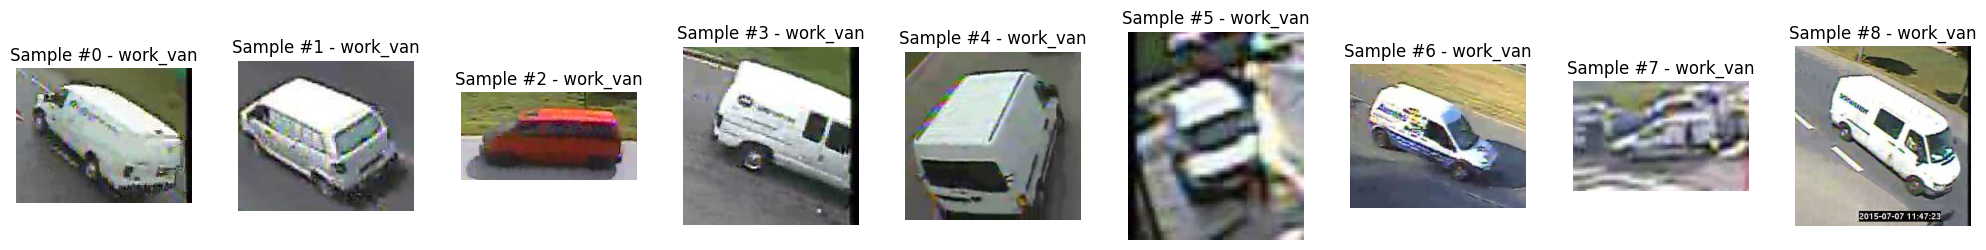

In [6]:
visual(class_,9,True)

0 (480, 720, 3) car [382, 205, 474, 264]
[382, 205, 474, 264]
1 (228, 342, 3) motorized_vehicle [1, 105, 59, 152]
[1, 105, 59, 152]
2 (480, 720, 3) car [126, 257, 297, 388]
[126, 257, 297, 388]
3 (480, 720, 3) car [27, 96, 37, 110]
[27, 96, 37, 110]
4 (480, 720, 3) car [188, 75, 295, 163]
[188, 75, 295, 163]
5 (480, 720, 3) car [301, 112, 353, 129]
[301, 112, 353, 129]
6 (480, 720, 3) car [599, 161, 637, 206]
[599, 161, 637, 206]
7 (480, 720, 3) car [4, 185, 64, 217]
[4, 185, 64, 217]
8 (480, 720, 3) car [602, 130, 625, 144]
[602, 130, 625, 144]


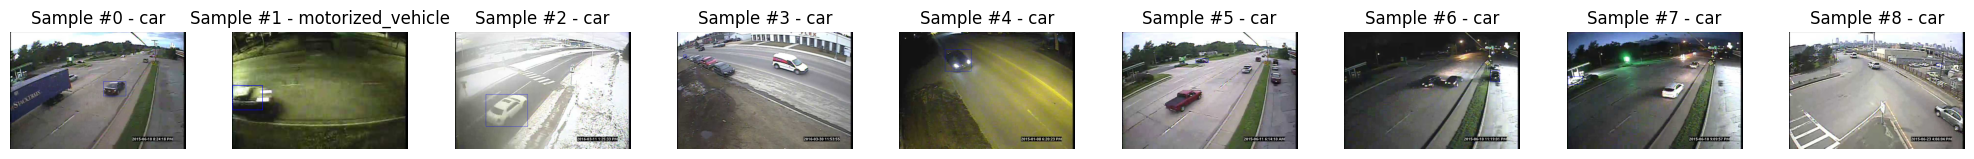

In [7]:
visual(local,9,False)

In [8]:
#This cell scales up the data
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size,classify):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size
        self.classify = classify

    def __call__(self, sample):

      if self.classify == True:
        image, labels = sample['image'], sample['label']

        h, w = image.shape[:2]

        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))
        plt.imshow(img)

        return {'image': img, 'label': labels}

      else:
        image, labels, bbox = sample['image'], sample['label'], sample['bbox']

        h, w = image.shape[:2]
        box_h,box_w = bbox[2]-bbox[0], bbox[3]-bbox[1] #this finds the height and width of the boundary box


        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)
        nbbox = [0,0,0,0] #this creates a base list for the new box after the image is scaled up/down
        nbbox[0] = int(new_w*(bbox[0]/w)) #these lines uses the new height or width of the image and multiples that to the ratio of the box coordinates to the old width or height. This works because the box coordinates compared the height and width should stay the same, the both get scaled up or down
        nbbox[1] = int(new_h*(bbox[1]/h))
        nbbox[2] = int(new_w*(bbox[2]/w))
        nbbox[3] = int(new_h*(bbox[3]/h))

        img = transform.resize(image, (new_h, new_w))
        print (img.shape)
        img_out = cv2.rectangle(img,(nbbox[0],nbbox[1]),(nbbox[2],nbbox[3]),(0,0,255),1) #this prints out the boundary box on the image
        plt.imshow(img_out)
        print(labels)

        return {'image': img, 'label': labels, 'bbox': nbbox}

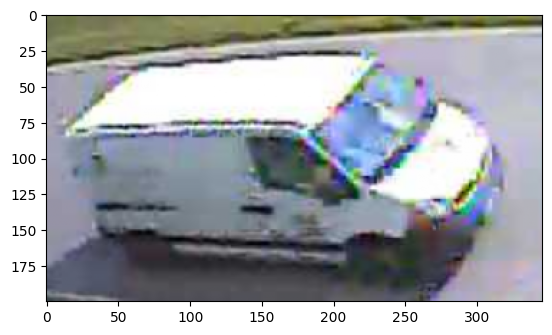

In [9]:
scale = Rescale(200,True)
out_img = scale(class_[333])

(200, 300, 3)
car


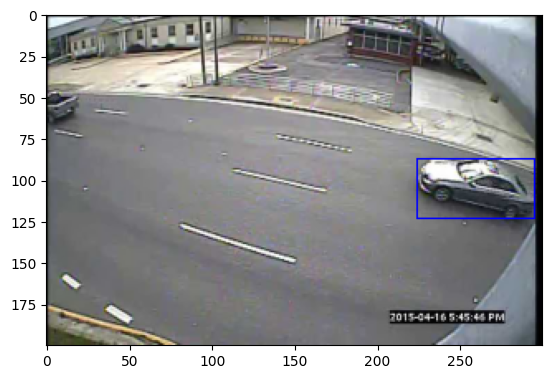

In [10]:
scale = Rescale(200,False)
out_img = scale(local[333])

In [11]:
class Flip(object):
  def __init__(self,direction,classify):
     self.direction = direction
     self.classify = classify


  def __call__(self, sample):
    if self.classify == True:
       image, labels = sample['image'], sample['label']


       if self.direction == 0:
         img = np.flip(image,0)

       else:
        img =np.flip(image,1)

       plt.imshow(img)
       return {'image': img, 'label': labels}


    else:
      image, labels, bbox = sample['image'], sample['label'], sample['bbox']

      h, w = image.shape[:2]
      flipbox = [0,0,0,0] #this creates a list for the new coordinates after the image is flipped

      if self.direction == 0:
        img = np.flip(image,0)
        flipbox[0] = bbox[0]
        flipbox[1] = int(h - bbox[1]) # this take the old y1 and subtracts it by the height of the image to get the new y1. When the image is flipped the old y1 will equal the distance to the end of the axis instead of the beginning so we need to find the new y1 that is measure from the beginning. Same for the other values below
        flipbox[2] = bbox[2]
        flipbox[3] = int(h - bbox[3]) # when you flip verically then you have to update the y1 and y2 values
        print(flipbox)


      else:
        img =np.flip(image,1)
        flipbox[0] = int(w - bbox[0]) #when you flip horizontally then you have to update the x1 and x2 values.
        flipbox[1] = bbox[1]
        flipbox[2] = int(w - bbox[2])
        flipbox[3] = bbox[3]

      img_out = cv2.rectangle(np.array(img),(flipbox[0],flipbox[1]),(flipbox[2],flipbox[3]),(0,0,255),1) #prints the flipped image and the new box for the flipped vehicle
      plt.imshow(img_out)
      print(labels)

      return {'image': img, 'label': labels, 'bbox': flipbox}

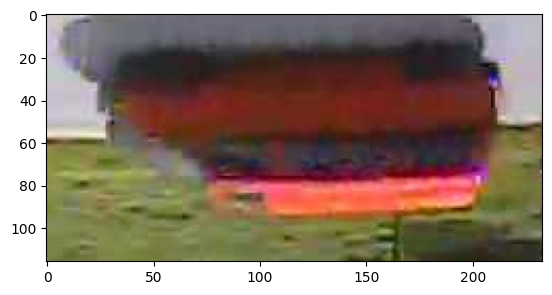

In [12]:
flip_v = Flip(0,True)
vtest = flip_v(class_[2])

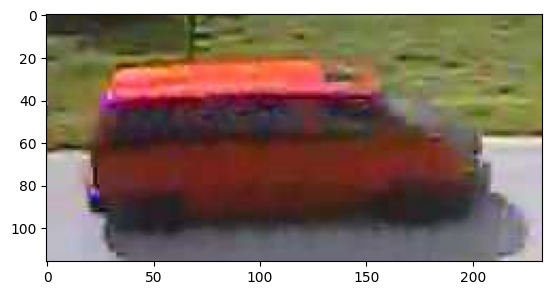

In [13]:
flip_h = Flip(1,True)
htest = flip_h(class_[2])

[126, 223, 297, 92]
car


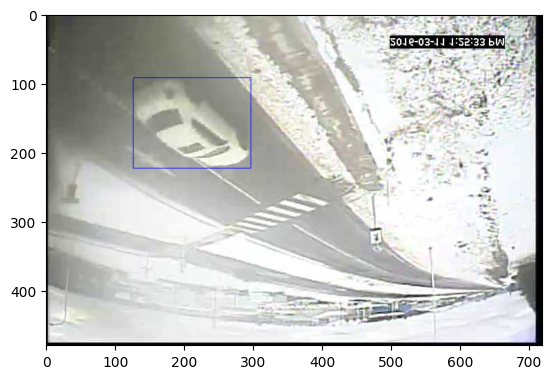

In [14]:
flip_v = Flip(0,False)
vtest = flip_v(local[2])

car


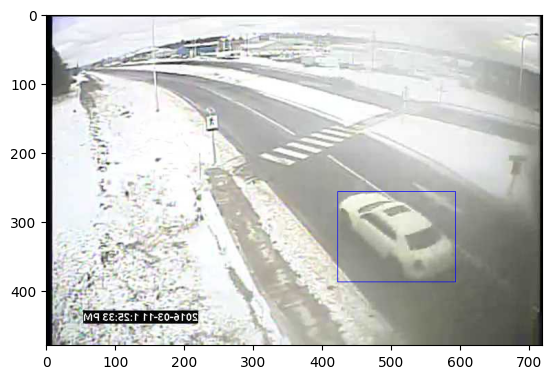

In [15]:
flip_h = Flip(1,False)
htest = flip_h(local[2])

In [16]:
#this changes the data to tensors
class ToTensor(object):


  def __call__(self, sample):

    img,lbl =sample['image'],sample['label']


    img_np = img.transpose(2,0,1)
    tensor_from_np = torch.from_numpy(img_np)


    sample = {'image':tensor_from_np, 'label':lbl}
    return sample

In [17]:
tens = ToTensor()

In [18]:
tens_class_ = tens(class_[23])
print(tens_class_)

{'image': tensor([[[117, 117, 115,  ..., 137, 138, 141],
         [115, 115, 116,  ..., 139, 139, 140],
         [124, 125, 127,  ..., 149, 148, 147],
         ...,
         [ 78,  75,  71,  ..., 137, 137, 137],
         [ 61,  67,  68,  ..., 138, 138, 138],
         [ 52,  63,  67,  ..., 139, 139, 139]],

        [[115, 115, 113,  ..., 147, 148, 151],
         [113, 113, 114,  ..., 149, 149, 150],
         [122, 123, 125,  ..., 159, 158, 157],
         ...,
         [ 82,  79,  73,  ..., 138, 138, 138],
         [ 67,  73,  74,  ..., 139, 139, 139],
         [ 61,  72,  76,  ..., 140, 140, 140]],

        [[116, 116, 114,  ..., 156, 157, 160],
         [114, 114, 115,  ..., 158, 158, 159],
         [123, 124, 126,  ..., 168, 167, 166],
         ...,
         [ 81,  78,  72,  ..., 159, 159, 159],
         [ 65,  71,  72,  ..., 160, 160, 160],
         [ 58,  69,  73,  ..., 161, 161, 161]]], dtype=torch.uint8), 'label': 'work_van'}


In [19]:
tens_local = tens(local[33])
print(tens_local)

{'image': tensor([[[20, 27, 15,  ...,  9, 10, 11],
         [12, 15,  5,  ...,  8,  9,  9],
         [12,  9, 11,  ...,  7,  7,  7],
         ...,
         [ 5, 24, 52,  ...,  2,  3,  4],
         [ 5, 24, 52,  ...,  2,  3,  4],
         [ 5, 24, 52,  ...,  2,  3,  4]],

        [[20, 27, 15,  ...,  8,  9, 10],
         [12, 15,  5,  ...,  7,  8,  8],
         [12,  9, 11,  ...,  6,  6,  6],
         ...,
         [ 5, 24, 52,  ...,  2,  3,  4],
         [ 5, 24, 52,  ...,  2,  3,  4],
         [ 5, 24, 52,  ...,  2,  3,  4]],

        [[20, 27, 15,  ..., 14, 15, 16],
         [12, 15,  5,  ..., 13, 14, 14],
         [12,  9, 11,  ..., 12, 12, 12],
         ...,
         [ 5, 24, 50,  ...,  2,  3,  4],
         [ 5, 24, 50,  ...,  2,  3,  4],
         [ 5, 24, 50,  ...,  2,  3,  4]]], dtype=torch.uint8), 'label': 'car'}


In [20]:
compose_transforms = transforms.Compose([Rescale(500,True), Flip(0,True),ToTensor()])
C_data = load_data('/content/drive/MyDrive/Advanced Research Methods/Homework 1/data/classification/data','train.csv',True,transform=compose_transforms)

initialize


In [21]:
compose_transforms = transforms.Compose([Rescale(500,False), Flip(0,False),ToTensor()])
L_data = load_data('/content/drive/MyDrive/Advanced Research Methods/Homework 1/data/localize','classd/train.csv',False,transform=compose_transforms)

initialize


In [22]:
#Was told to skip Normalizing for this assignment because we will be doing it later in the semester